In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
ls = ['-', '--', '-.']

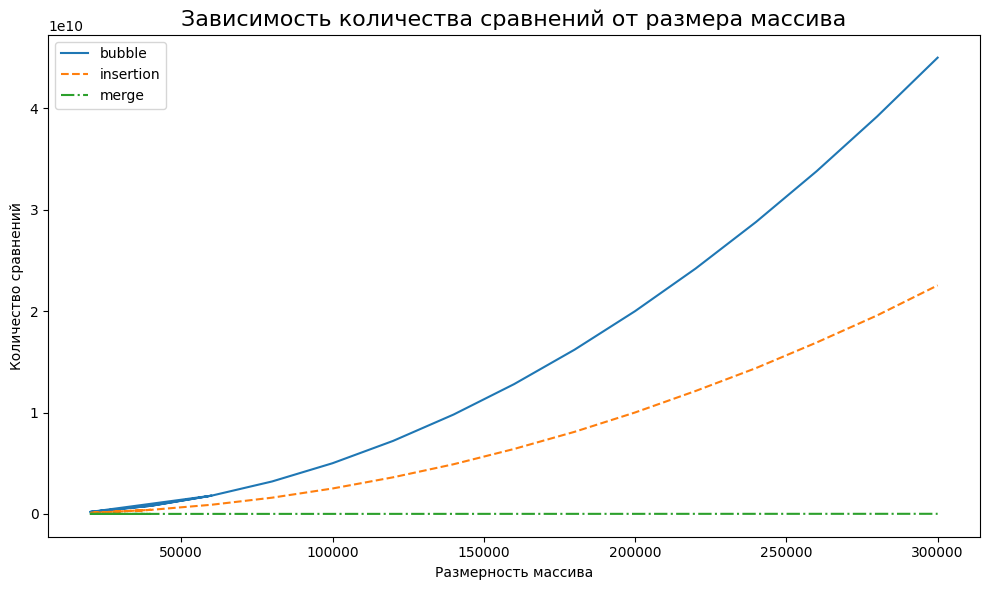

In [12]:

# Список файлов с данными
files = [
    'bubble_compare.txt',
    'insertion_compare.txt',
    'merge_compare.txt',
]

# Создаем фигуру и оси
plt.figure(figsize=(10, 6))
plt.title('Зависимость количества сравнений от размера массива', fontsize=16)
plt.xlabel('Размерность массива')
plt.ylabel('Количество сравнений')

i = 0
# Итерируемся по файлам
for file in files:
    # Извлекаем имя алгоритма из названия файла
    algorithm = file.split('_')[0]

    # Читаем данные из файла
    with open(file, 'r') as f:
        data = [list(map(int, line.split())) for line in f]

    # Создаем DataFrame из данных
    df = pd.DataFrame(data, columns=['Размер', 'Кол-во сравнений'])

    # Строим график
    plt.plot(df['Размер'], df['Кол-во сравнений'], label=algorithm, ls=ls[i])
    i += 1

plt.legend()
plt.tight_layout()
plt.show()

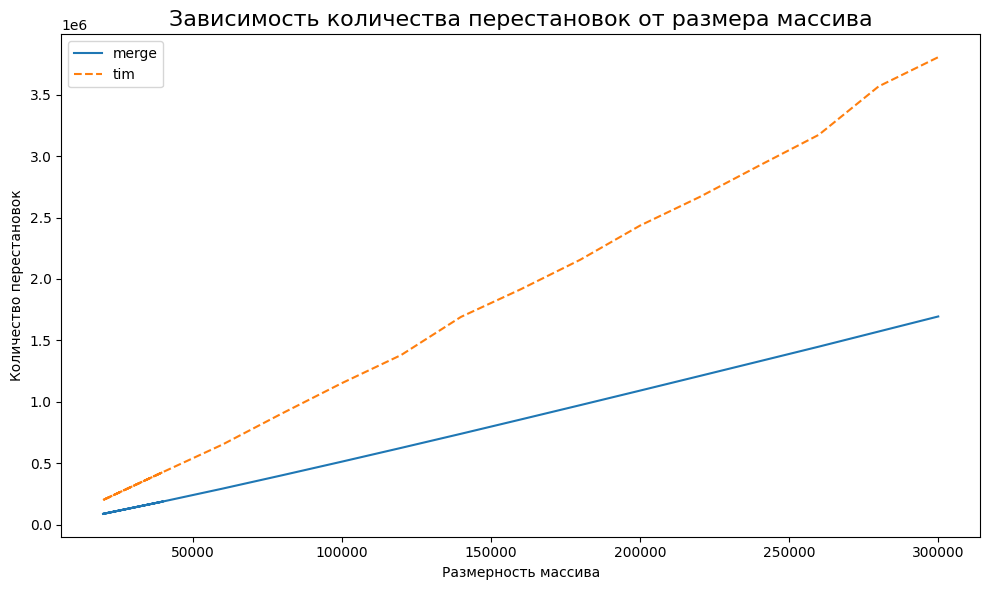

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Список файлов с данными
files = {
    'merge': ['merge_move.txt'],
    'tim': ['tim_swap.txt', 'tim_move.txt'],
    

}

# Создаем фигуру и оси
plt.figure(figsize=(10, 6))
plt.title('Зависимость количества перестановок от размера массива', fontsize=16)
plt.xlabel('Размерность массива')
plt.ylabel('Количество перестановок')

i = 0
# Итерируемся по алгоритмам
for algorithm, file_list in files.items():
    swap_data = []

    # Читаем данные из файлов
    for file in file_list:
        with open(file, 'r') as f:
            data = [list(map(int, line.split())) for line in f]

        if 'move' in file:
            df = pd.DataFrame(data, columns=['Размер', 'Move'])
            df['Swap'] = df['Move'] // 3  # 3 move = 1 swap
            swap_data.append(df[['Размер', 'Swap']])
        else:
            df = pd.DataFrame(data, columns=['Размер', 'Swap'])
            swap_data.append(df)

    if len(swap_data) > 1:
        df = swap_data[0]
        for i in range(1, len(swap_data)):
            df['Swap'] += swap_data[i]['Swap']
    else:
        df = swap_data[0]

    # Строим график
    plt.plot(df['Размер'], df['Swap'], label=algorithm, ls=ls[i])
    i += 1

plt.legend()
plt.tight_layout()
plt.show()